In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.pyplot import matplotlib as plt

In [2]:
OR = pd.read_csv('/home/mussie/Music/challenge/data/OnlineRetail.csv')

In [3]:
OR.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [4]:
OR.shape

(541909, 8)

In [5]:
# 1

OR.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom


In [6]:
OR.tail(12)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541897,581587,22728,ALARM CLOCK BAKELIKE PINK,4,12/9/2011 12:50,3.75,12680.0,France
541898,581587,22727,ALARM CLOCK BAKELIKE RED,4,12/9/2011 12:50,3.75,12680.0,France
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,12/9/2011 12:50,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,12/9/2011 12:50,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,12/9/2011 12:50,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,12/9/2011 12:50,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,12/9/2011 12:50,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France


In [7]:
#2

OR.dropna(inplace=True)
print('valid customers' ,OR.shape)

valid customers (406829, 8)


In [8]:
#3 

OR['Sale Value'] = OR['Quantity'] * OR['UnitPrice']
OR.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00


In [34]:
Recency_value = OR.groupby(by='CustomerID')['InvoiceDate'].sum()
Frequency_value= OR.groupby(by= 'CustomerID')['InvoiceDate'].count()
Monitory_value = OR.groupby(by= 'CustomerID')['Sale Value'].sum()

In [35]:
first = pd.merge(right=Recency_value,left=Frequency_value ,on='CustomerID')
final = pd.merge(left=first, right= Monitory_value, on='CustomerID')
df = pd.merge(left=OR,right=final,on='CustomerID')

In [20]:
OR['Sale Value']

In [25]:
#scalling our columns befor clustering
data_scaled = OR.copy()

scaler=StandardScaler()
cols_to_scale =[ 'Sale Value','Quantity']
data_scaled[cols_to_scale] = scaler.fit_transform(OR[cols_to_scale])


In [28]:

cluster_cols = ['Sale Value','Quantity']
model = KMeans(n_clusters=3, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])


/home/mussie/anaconda3/envs/exam/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [33]:
data_scaled['Cluster'].value_counts()

0    406825
2         2
1         2
Name: Cluster, dtype: int64

/tmp/ipykernel_11457/3533468643.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  OR.groupby('Cluster')['Sale Value','Quantity'].mean().plot.bar(color=['gray','black'])


AttributeError: module 'matplotlib' has no attribute 'show'

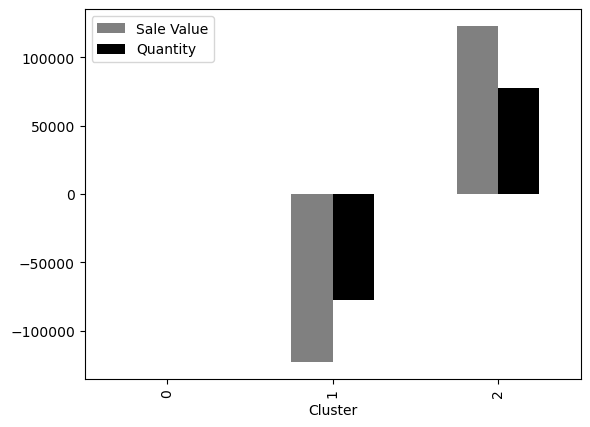

In [37]:
#visualizing our clusters
#OR['Cluster'] = data_scaled.Cluster

OR.groupby('Cluster')['Sale Value','Quantity'].mean().plot.bar(color=['gray','black'])
plt.show()

In [14]:
data_scaled.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale Value,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34,0
